## In Class Activity 1

- Cluster the penguins data into 3 clusters
- Visualize the clusters across all features using `sns.pairplot()`
    - add your clusters as a new column of the dataframe with `df_penguin['cluster'] = y` or similar    
    - `sns.pairplot(data=df_penguin, hue='cluster', palette='Set2')`
- Which features does the clustering do a good (or bad) job of seperating? Why?  
    - Are other features ignored because of their small variance ... how can we fix this?


In [1]:
# load required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# download data
df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(axis=0, inplace=True, how='any')
    
df_penguin.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


<Figure size 432x288 with 0 Axes>

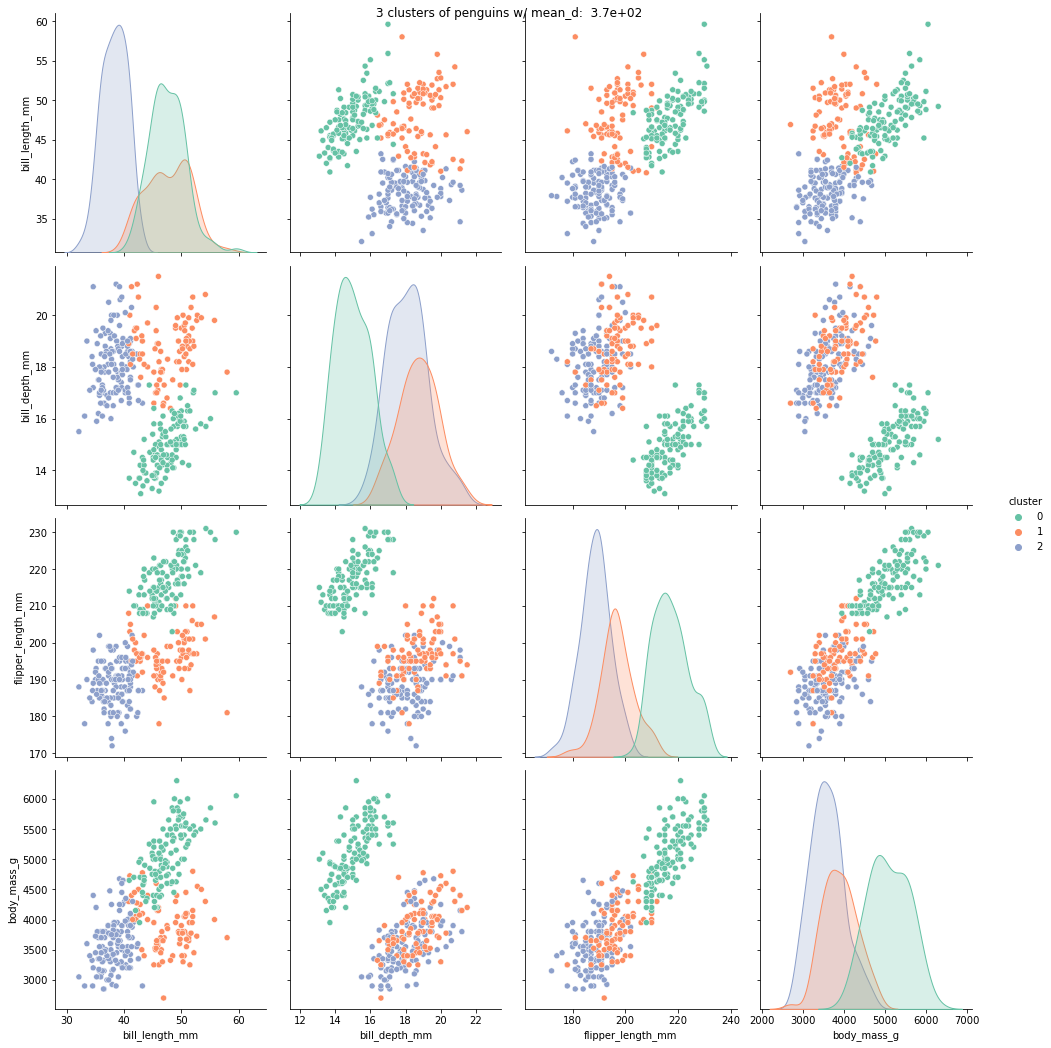

In [3]:
from sklearn.cluster import KMeans

# k in k-means describes the number of clusters
n_clusters = 3

# extract x features 
x_feat_list = ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']
x = df_penguin.loc[:, x_feat_list].values

# normalize scale
x = x @ np.diag(1 / x.std(axis=0))

# perform clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
y = kmeans.predict(x)

# compute mean distance
mean_d = -kmeans.score(x)


# add cluster to dataset
df_penguin['cluster'] = y

# plot & visualize
plt.figure()
sns.pairplot(data=df_penguin,hue='cluster', palette='Set2')
plt.suptitle(f'{n_clusters} clusters of penguins w/ mean_d: {mean_d: 0.1e}', ha='center',
            va='baseline')
plt.gcf().set_size_inches(15, 15)


### response:

Before normalizing the scale, bill_length, bill_depth, and flipper_length have bad clustering. Most of the plots for these three features are mixed without a distinctive separation. To fix this issue, we can normalize the scale.